<a href="https://colab.research.google.com/github/marcelasfl/API_devweb/blob/master/C%C3%B3pia_de_IA_BFS_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Marcela Starling


In [ ]:
import networkx as nx
import numpy as np

In [ ]:
from collections import deque

In [ ]:
G = nx.Graph()

In [ ]:

G.add_edges_from(
    [('v','r'),
     ('r','s'),
     ('s','w'),
     ('w','t'),
     ('w','x'),
     ('t','x'),
     ('t','u'),
     ('x','u'),
     ('x','z'),
     ('u','z')
     ]
)

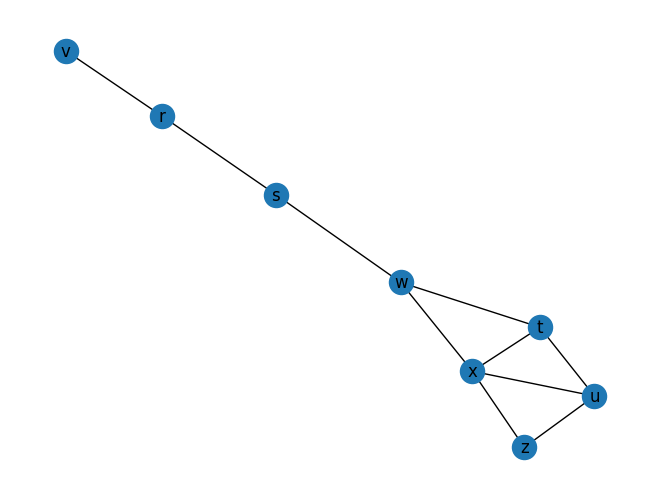

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
s = 's'

In [ ]:
G.nodes()

NodeView(('v', 'r', 's', 'w', 't', 'x', 'u', 'z'))

In [ ]:
G.edges()

EdgeView([('v', 'r'), ('r', 's'), ('s', 'w'), ('w', 't'), ('w', 'x'), ('t', 'x'), ('t', 'u'), ('x', 'u'), ('x', 'z'), ('u', 'z')])

In [ ]:
# def BFS(G,s):

# INICIALIZACAO
for v in G.nodes() - {s}:
    G.nodes[v]['cor'] = 'branco'
    G.nodes[v]['dis'] = np.inf

G.nodes[s]['cor'] = 'cinza'
G.nodes[s]['dis'] = 0

# Fila (append (right), popleft)
Q = deque()
Q.append(s)

In [ ]:
G.nodes(data=True)

NodeDataView({'v': {'cor': 'branco', 'dis': inf}, 'r': {'cor': 'branco', 'dis': inf}, 's': {'cor': 'cinza', 'dis': 0}, 'w': {'cor': 'branco', 'dis': inf}, 't': {'cor': 'branco', 'dis': inf}, 'x': {'cor': 'branco', 'dis': inf}, 'u': {'cor': 'branco', 'dis': inf}, 'z': {'cor': 'branco', 'dis': inf}})

In [ ]:
while len(Q) != 0:
    u = Q.popleft()

    for v in G.neighbors(u):
        if G.nodes[v]['cor'] == 'branco':
            G.nodes[v]['cor'] = 'cinza'
            G.nodes[v]['dis'] = G.nodes[u]['dis'] + 1
            G.nodes[v]['pre'] = u

            Q.append(v)

    print(u)

    G.nodes[u]['cor'] = 'preto'

s
r
w
v
t
x
u
z


In [ ]:
for node in G.nodes(data=True):
    print(node)

('v', {'cor': 'preto', 'dis': 2, 'pre': 'r'})
('r', {'cor': 'preto', 'dis': 1, 'pre': 's'})
('s', {'cor': 'preto', 'dis': 0})
('w', {'cor': 'preto', 'dis': 1, 'pre': 's'})
('t', {'cor': 'preto', 'dis': 2, 'pre': 'w'})
('x', {'cor': 'preto', 'dis': 2, 'pre': 'w'})
('u', {'cor': 'preto', 'dis': 3, 'pre': 't'})
('z', {'cor': 'preto', 'dis': 3, 'pre': 'x'})


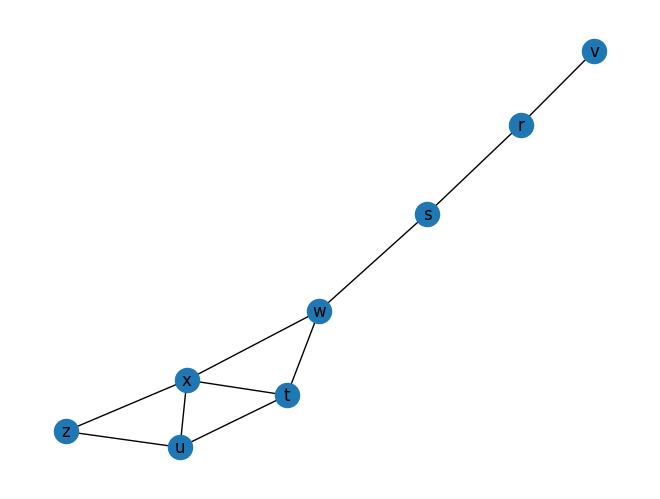

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
def caminho_minimo(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

In [ ]:
caminho_minimo(G, 's', 'z')


['s', 'w', 'x', 'z']

In [ ]:
caminho_minimo(G, 's', 'v')


['s', 'r', 'v']

## Exercícios:

### 1) Implemente o DFS a partir de uma variante do código acima

### 2) De maneir simlar ao exercício 1, Implemente o ID-DFS

In [ ]:
# Exercício 1
def dfs(graph, start):
    visited = set()

    def dfs_recursive(v):
        if v not in visited:
            visited.add(v)
            print(v, end=" ")
            for neighbor in graph.neighbors(v):
                dfs_recursive(neighbor)

    dfs_recursive(start)

print("DFS a partir de 'v':")
dfs(G, 'v')



DFS a partir de 'v':
v r s w t x u z ID-DFS a partir de 'v':

Profundidade: 1
v 
Profundidade: 2
v r 
Profundidade: 3
v r s 
Profundidade: 4
v r s w 
Profundidade: 5
v r s w t x 

In [ ]:
# Exercício 2
def dfs_limited(graph, node, depth, visited=set()):
    if depth == 0:
        return False
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if dfs_limited(graph, neighbor, depth - 1, visited):
                return True
    return False

def iddfs(graph, start, max_depth):
    for depth in range(1, max_depth + 1):
        visited = set()
        print(f"\nProfundidade: {depth}")
        dfs_limited(graph, start, depth, visited)

print("ID-DFS a partir de 'v':")
iddfs(G, 'v', 7)


ID-DFS a partir de 'v':

Profundidade: 1
v 
Profundidade: 2
v r 
Profundidade: 3
v r s 
Profundidade: 4
v r s w 
Profundidade: 5
v r s w t x 
Profundidade: 6
v r s w t x u 
Profundidade: 7
v r s w t x u z 